In [2]:
#pip install tensorflow_io

In [3]:
import os

from IPython import display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [4]:
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [5]:
testing_wav_file_name = tf.keras.utils.get_file('gunfire.wav',
                                                'https://storage.googleapis.com/audioset/yamalyzer/audio/gunfire.wav',
                                                cache_dir='./',
                                                cache_subdir='test_data')

print(testing_wav_file_name)

1138688/1125276 [==============================] - 0s 0us/step
./test_data\gunfire.wav


In [6]:
# Utility functions for loading audio files and making sure the sample rate is correct.

@tf.function
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

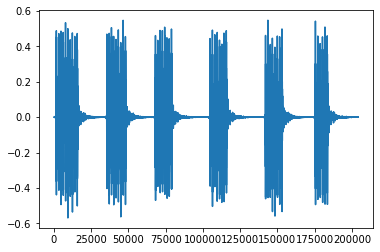

In [7]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data,rate=16000)

In [8]:
class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
class_names =list(pd.read_csv(class_map_path)['display_name'])

for name in class_names[:]:
  print(name)
print('...')

Speech
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer
Shout
Bellow
Whoop
Yell
Children shouting
Screaming
Whispering
Laughter
Baby laughter
Giggle
Snicker
Belly laugh
Chuckle, chortle
Crying, sobbing
Baby cry, infant cry
Whimper
Wail, moan
Sigh
Singing
Choir
Yodeling
Chant
Mantra
Child singing
Synthetic singing
Rapping
Humming
Groan
Grunt
Whistling
Breathing
Wheeze
Snoring
Gasp
Pant
Snort
Cough
Throat clearing
Sneeze
Sniff
Run
Shuffle
Walk, footsteps
Chewing, mastication
Biting
Gargling
Stomach rumble
Burping, eructation
Hiccup
Fart
Hands
Finger snapping
Clapping
Heart sounds, heartbeat
Heart murmur
Cheering
Applause
Chatter
Crowd
Hubbub, speech noise, speech babble
Children playing
Animal
Domestic animals, pets
Dog
Bark
Yip
Howl
Bow-wow
Growling
Whimper (dog)
Cat
Purr
Meow
Hiss
Caterwaul
Livestock, farm animals, working animals
Horse
Clip-clop
Neigh, whinny
Cattle, bovinae
Moo
Cowbell
Pig
Oink
Goat
Bleat
Sheep
Fowl
Chicken, rooster
Cluck
Crowi

In [9]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

The main sound is: Explosion
The embeddings shape: (26, 1024)


In [10]:
_ = tf.keras.utils.get_file('esc-50.zip',
                        'https://github.com/karoldvl/ESC-50/archive/master.zip',
                        cache_dir='./',
                        cache_subdir='datasets',
                        extract=True)

In [11]:
esc50_csv = './datasets/ESC-50-master/meta/esc50.csv'
base_data_path = './datasets/ESC-50-master/audio/'

pd_data = pd.read_csv(esc50_csv)
pd_data.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [12]:
pd_data.value_counts()

filename           fold  target  category     esc10  src_file  take
5-9032-A-0.wav     5     0       dog          True   9032      A       1
2-60791-A-26.wav   2     26      laughing     False  60791     A       1
2-52789-A-4.wav    2     4       frog         False  52789     A       1
2-54086-A-43.wav   2     43      car_horn     False  54086     A       1
2-54961-A-23.wav   2     23      breathing    False  54961     A       1
                                                                      ..
4-167063-B-11.wav  4     11      sea_waves    True   167063    B       1
4-167063-C-11.wav  4     11      sea_waves    True   167063    C       1
4-167077-A-20.wav  4     20      crying_baby  True   167077    A       1
4-167077-B-20.wav  4     20      crying_baby  True   167077    B       1
1-100032-A-0.wav   1     0       dog          True   100032    A       1
Length: 2000, dtype: int64

In [13]:
my_classes = ['helicopter', 'rain', 'sea_waves', 'crackling_fire', 'crickets', 'cat', 'chainsaw', 'siren', 
              'car_horn', 'engine', 'chirping_birds', 'water_drops', 'wind', 'pouring_water', 'thunderstorm', 'train',
              'church_bells', 'clock_alarm', 'fireworks', 'frog','glass_breaking','hand_saw', 'insects'
             ]
map_class_to_id = {'helicopter':0, 'rain':1, 'sea_waves':1, 'crackling_fire':1, 'crickets':1, 'cat':1, 
                   'chainsaw':0, 'siren':0, 'car_horn':0, 'engine':0, 'chirping_birds': 1, 'water_drops':1, 'wind':1,'pouring_water':1, 'thunderstorm':1, 'train':0,
                  'church_bells':0, 'clock_alarm':0, 'fireworks':0, 'frog':1, 'glass_breaking':0, 'hand_saw':0, 'insects':1

}


filtered_pd = pd_data[pd_data.category.isin(my_classes)]

class_id = filtered_pd['category'].apply(lambda name: map_class_to_id[name])
filtered_pd = filtered_pd.assign(target=class_id)

full_path = filtered_pd['filename'].apply(lambda row: os.path.join(base_data_path, row))
filtered_pd = filtered_pd.assign(filename=full_path)

filtered_pd.head(10)

,filename,fold,target,category,esc10,src_file,take
1,./datasets/ESC-50-master/audio/1-100038-A-14.wav,1,1,chirping_birds,False,100038,A
4,./datasets/ESC-50-master/audio/1-101296-A-19.wav,1,1,thunderstorm,False,101296,A
5,./datasets/ESC-50-master/audio/1-101296-B-19.wav,1,1,thunderstorm,False,101296,B
16,./datasets/ESC-50-master/audio/1-115521-A-19.wav,1,1,thunderstorm,False,115521,A
17,./datasets/ESC-50-master/audio/1-115545-A-48.wav,1,0,fireworks,False,115545,A
18,./datasets/ESC-50-master/audio/1-115545-B-48.wav,1,0,fireworks,False,115545,B
19,./datasets/ESC-50-master/audio/1-115545-C-48.wav,1,0,fireworks,False,115545,C
20,./datasets/ESC-50-master/audio/1-115546-A-48.wav,1,0,fireworks,False,115546,A
24,./datasets/ESC-50-master/audio/1-116765-A-41.wav,1,0,chainsaw,True,116765,A
27,./datasets/ESC-50-master/audio/1-118559-A-17.wav,1,1,pouring_water,False,118559,A


In [14]:
binary_map = {'helicopter':'unnatural', 'rain':'natural', 'sea_waves':'natural', 'crackling_fire':'natural', 
              'crickets':'natural', 'cat':'natural', 'chainsaw':'unnatural', 'siren':'unnatural', 
              'car_horn':'unnatural', 'engine':'unnatural', 'chirping_birds':'natural', 'water_drops':'natural', 
             'wind':'natural', 'pouring_water':'natural', 'thunderstorm':'natural', 'train':'unnatural', 'church_bells':'unnatural'
              ,'clock_alarm':'unnatural', 'fireworks':'unnatural', 'frog':'natural', 'glass_breaking':'unnatural', 'hand_saw':'unnatural'
              ,'insects':'natural'
             }


filtered_pd.replace({"category":binary_map}, inplace=True)
filtered_pd

,filename,fold,target,category,esc10,src_file,take
1,./datasets/ESC-50-master/audio/1-100038-A-14.wav,1,1,natural,False,100038,A
4,./datasets/ESC-50-master/audio/1-101296-A-19.wav,1,1,natural,False,101296,A
5,./datasets/ESC-50-master/audio/1-101296-B-19.wav,1,1,natural,False,101296,B
16,./datasets/ESC-50-master/audio/1-115521-A-19.wav,1,1,natural,False,115521,A
17,./datasets/ESC-50-master/audio/1-115545-A-48.wav,1,0,unnatural,False,115545,A
...,...,...,...,...,...,...,...
1980,./datasets/ESC-50-master/audio/5-260433-A-39.wav,5,0,unnatural,False,260433,A
1981,./datasets/ESC-50-master/audio/5-260434-A-39.wav,5,0,unnatural,False,260434,A
1984,./datasets/ESC-50-master/audio/5-261433-A-15.wav,5,1,natural,False,261433,A
1985,./datasets/ESC-50-master/audio/5-261439-A-15.wav,5,1,natural,False,261439,A


In [15]:
filenames = filtered_pd['filename']
targets = filtered_pd['target']
folds = filtered_pd['fold']

main_ds = tf.data.Dataset.from_tensor_slices((filenames, targets, folds))
main_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [16]:
def load_wav_for_map(filename, label, fold):
  return load_wav_16k_mono(filename), label, fold

main_ds = main_ds.map(load_wav_for_map)
main_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [17]:
# applies the embedding extraction model to a wav data
def extract_embedding(wav_data, label, fold):
  ''' run YAMNet to extract embedding from the wav data '''
  scores, embeddings, spectrogram = yamnet_model(wav_data)
  num_embeddings = tf.shape(embeddings)[0]
  return (embeddings,
            tf.repeat(label, num_embeddings),
            tf.repeat(fold, num_embeddings))

# extract embedding
main_ds = main_ds.map(extract_embedding).unbatch()
main_ds.element_spec

(TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [18]:
cached_ds = main_ds.cache()
train_ds = cached_ds.filter(lambda embedding, label, fold: fold < 4)
val_ds = cached_ds.filter(lambda embedding, label, fold: fold == 4)
test_ds = cached_ds.filter(lambda embedding, label, fold: fold == 5)

# remove the folds column now that it's not needed anymore
remove_fold_column = lambda embedding, label, fold: (embedding, label)

train_ds = train_ds.map(remove_fold_column)
val_ds = val_ds.map(remove_fold_column)
test_ds = test_ds.map(remove_fold_column)

train_ds = train_ds.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [19]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1024), dtype=tf.float32,
                          name='input_embedding'),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(len(my_classes))
    tf.keras.layers.Dense(2)
], name='my_model')

my_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 525,826
Trainable params: 525,826
Non-trainable params: 0
_________________________________________________________________


In [20]:
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer="adam",
                 metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=5,
                                            restore_best_weights=True)

In [21]:
history = my_model.fit(train_ds,
                       epochs=100,
                       validation_data=val_ds,
                       #callbacks=callback
                      )

Epoch 1/100
173/173 [==============================] - 161s 824ms/step - loss: 0.4000 - accuracy: 0.8909 - val_loss: 0.2844 - val_accuracy: 0.8636
Epoch 2/100
173/173 [==============================] - 3s 16ms/step - loss: 0.3011 - accuracy: 0.9225 - val_loss: 0.2427 - val_accuracy: 0.8995
Epoch 3/100
173/173 [==============================] - 3s 16ms/step - loss: 0.1494 - accuracy: 0.9362 - val_loss: 0.2286 - val_accuracy: 0.8891
Epoch 4/100
173/173 [==============================] - 3s 16ms/step - loss: 0.1308 - accuracy: 0.9426 - val_loss: 0.2357 - val_accuracy: 0.9120
Epoch 5/100
173/173 [==============================] - 3s 16ms/step - loss: 0.1232 - accuracy: 0.9478 - val_loss: 0.2347 - val_accuracy: 0.9082
Epoch 6/100
173/173 [==============================] - 3s 16ms/step - loss: 0.1060 - accuracy: 0.9505 - val_loss: 0.2870 - val_accuracy: 0.8880
Epoch 7/100
173/173 [==============================] - 3s 15ms/step - loss: 0.0993 - accuracy: 0.9562 - val_loss: 0.2559 - val_accura

173/173 [==============================] - 3s 15ms/step - loss: 0.0466 - accuracy: 0.9745 - val_loss: 0.5816 - val_accuracy: 0.8951
Epoch 58/100
173/173 [==============================] - 3s 15ms/step - loss: 0.0487 - accuracy: 0.9741 - val_loss: 0.5822 - val_accuracy: 0.8984
Epoch 59/100
173/173 [==============================] - 3s 15ms/step - loss: 0.0456 - accuracy: 0.9748 - val_loss: 0.5893 - val_accuracy: 0.8940
Epoch 60/100
173/173 [==============================] - 3s 15ms/step - loss: 0.0464 - accuracy: 0.9743 - val_loss: 0.5923 - val_accuracy: 0.8967
Epoch 61/100
173/173 [==============================] - 3s 15ms/step - loss: 0.0457 - accuracy: 0.9754 - val_loss: 0.5984 - val_accuracy: 0.8957
Epoch 62/100
173/173 [==============================] - 3s 14ms/step - loss: 0.0452 - accuracy: 0.9754 - val_loss: 0.6038 - val_accuracy: 0.8962
Epoch 63/100
173/173 [==============================] - 3s 16ms/step - loss: 0.0453 - accuracy: 0.9755 - val_loss: 0.6087 - val_accuracy: 0.897

In [22]:
my_model.save("my_model.h5")

In [23]:
loss, accuracy = my_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

58/58 [==============================] - 2s 7ms/step - loss: 0.6709 - accuracy: 0.9103
Loss:  0.6709094047546387
Accuracy:  0.9103260636329651


In [24]:
m_classes = ['unnatural', 'natural']

In [25]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
result = my_model(embeddings).numpy()

inferred_class = m_classes[result.mean(axis=0).argmax()]
print(f'The main sound is: {inferred_class}')

The main sound is: unnatural


In [26]:
type(inferred_class)

str

In [27]:
#pip install tensorflow==2.8.0

In [28]:
print(tf.__version__)

2.8.0
